In [188]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve


In [189]:
df_surveydata_train = pd.read_csv("Surveydata_train.csv")
df_surveydata_test = pd.read_csv("Surveydata_test.csv")
df_traveldata_test = pd.read_csv("Traveldata_test.csv")
df_traveldata_train = pd.read_csv("Traveldata_train.csv")

In [190]:
df_surveydata_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [191]:
df_traveldata_train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [192]:
df_surveydata_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [193]:
df_traveldata_train.isnull().sum()

ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

In [194]:
df_surveydata_test.isnull().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [195]:
df_traveldata_test.isnull().sum()

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

In [196]:
print(' Total number of count for data set df_surveydata_train: ',df_surveydata_train.ID.count())
print(' Total number of count for data set df_traveldata_train: ',df_traveldata_train.ID.count())
print(' Total number of count for data set df_surveydata_test: ',df_surveydata_test.ID.count())
print(' Total number of count for data set df_traveldata_test: ',df_traveldata_test.ID.count())

 Total number of count for data set df_surveydata_train:  94379
 Total number of count for data set df_traveldata_train:  94379
 Total number of count for data set df_surveydata_test:  35602
 Total number of count for data set df_traveldata_test:  35602


In [197]:
df_surveydata_train.groupby("ID")["ID"]

In [198]:
df2= df_surveydata_train.merge(df_traveldata_train)

In [199]:
df=df2.copy()

In [200]:
df_to_predict= df_surveydata_test.merge(df_traveldata_test)

In [201]:
df_to_predict_copy=df_to_predict.copy()

In [202]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0
Seat_comfort,94318,6,acceptable,21158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,94379,2,Green Car,47435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_time_convenient,85449,6,good,19574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,85638,6,acceptable,18468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_location,94349,6,manageable,24173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboardwifi_service,94349,6,good,22835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_entertainment,94361,6,good,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_support,94288,6,good,30016,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [204]:
df.Seat_comfort.unique()

array(['need improvement', 'poor', 'acceptable', 'good', 'excellent',
       'extremely poor', nan], dtype=object)

In [205]:
df[df.Seat_comfort.isnull()==True]

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
560,98800561,0,NaN,Green Car,NaN,good,need improvement,good,good,good,...,acceptable,good,Male,Loyal Customer,30.0,Business travel,Eco,1495,0.0,0.0
2214,98802215,1,NaN,Green Car,NaN,poor,manageable,good,good,good,...,excellent,good,Male,Loyal Customer,30.0,NaN,Business,4725,86.0,77.0
4754,98804755,0,NaN,Ordinary,NaN,need improvement,manageable,excellent,need improvement,poor,...,good,excellent,Male,Loyal Customer,63.0,Personal Travel,Eco,1380,0.0,0.0
5191,98805192,1,NaN,Green Car,NaN,acceptable,manageable,good,good,good,...,acceptable,good,Male,NaN,33.0,Business travel,Business,1436,6.0,25.0
8809,98808810,1,NaN,Green Car,NaN,acceptable,manageable,good,good,good,...,need improvement,good,Female,Loyal Customer,12.0,Personal Travel,Eco,3114,41.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86883,98886884,0,NaN,Green Car,NaN,acceptable,manageable,need improvement,acceptable,need improvement,...,good,need improvement,Male,Loyal Customer,13.0,Personal Travel,Eco,2188,4.0,0.0
87693,98887694,0,NaN,Green Car,NaN,excellent,very convinient,need improvement,need improvement,need improvement,...,acceptable,need improvement,Female,Loyal Customer,40.0,Business travel,Eco,2361,0.0,0.0
88765,98888766,0,NaN,Green Car,NaN,acceptable,Convinient,need improvement,acceptable,poor,...,acceptable,need improvement,Female,disloyal Customer,49.0,Business travel,Eco,1788,22.0,18.0
90800,98890801,0,NaN,Ordinary,NaN,excellent,need improvement,acceptable,acceptable,acceptable,...,good,acceptable,Male,Loyal Customer,37.0,Business travel,Eco,1528,76.0,56.0


In [206]:
df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [208]:
for cols in df_to_predict_copy.columns:
    if df_to_predict_copy[cols].dtype=="float64":
        df_to_predict_copy[cols] =df_to_predict_copy[cols].fillna(df_to_predict_copy[cols].mean())
    elif df_to_predict_copy[cols].dtype=="object":
        df_to_predict_copy[cols] =df_to_predict_copy[cols].fillna(df_to_predict_copy[cols].mode()[0])
    elif df_to_predict_copy[cols].dtype=="int64":
        df_to_predict_copy[cols] =df_to_predict_copy[cols].fillna(df_to_predict_copy[cols].median())

In [209]:
for cols in df.columns:
    if df[cols].dtype=="float64":
        df[cols] =df[cols].fillna(df[cols].mean())
    elif df[cols].dtype=="object":
        df[cols] =df[cols].fillna(df[cols].mode()[0])
    elif df[cols].dtype=="int64":
        df[cols] =df[cols].fillna(df[cols].median())

In [210]:
df_to_predict_copy.isnull().sum()

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

In [23]:
df.isnull().sum()

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

In [211]:
#Finding unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n\n')

Field name is  SEAT_COMFORT : and Count for this categories are  6
extremely poor       3463
excellent           12971
poor                15185
good                20595
need improvement    20946
acceptable          21219
Name: Seat_comfort, dtype: int64



Field name is  SEAT_CLASS : and Count for this categories are  2
Ordinary     46944
Green Car    47435
Name: Seat_Class, dtype: int64



Field name is  ARRIVAL_TIME_CONVENIENT : and Count for this categories are  6
extremely poor       4332
poor                13692
need improvement    14990
acceptable          15177
excellent           17684
good                28504
Name: Arrival_time_convenient, dtype: int64



Field name is  CATERING : and Count for this categories are  6
extremely poor       3910
excellent           13455
poor                13858
good                17969
need improvement    17978
acceptable          27209
Name: Catering, dtype: int64



Field name is  PLATFORM_LOCATION : and Count for this categories are  6


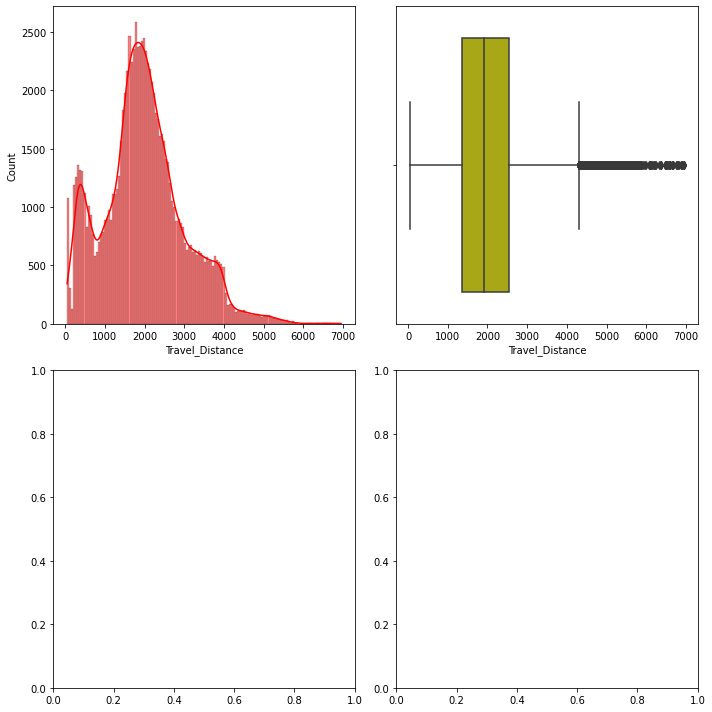

In [212]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
x=0
for i in df.columns:
    if i=='Travel_Distance':
        sns.histplot(x=df[i],kde=True,ax=axes[x][0],color='r');
        sns.boxplot(x=df[i],data=df,ax=axes[x][1],color='y');
        plt.tight_layout()

Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')


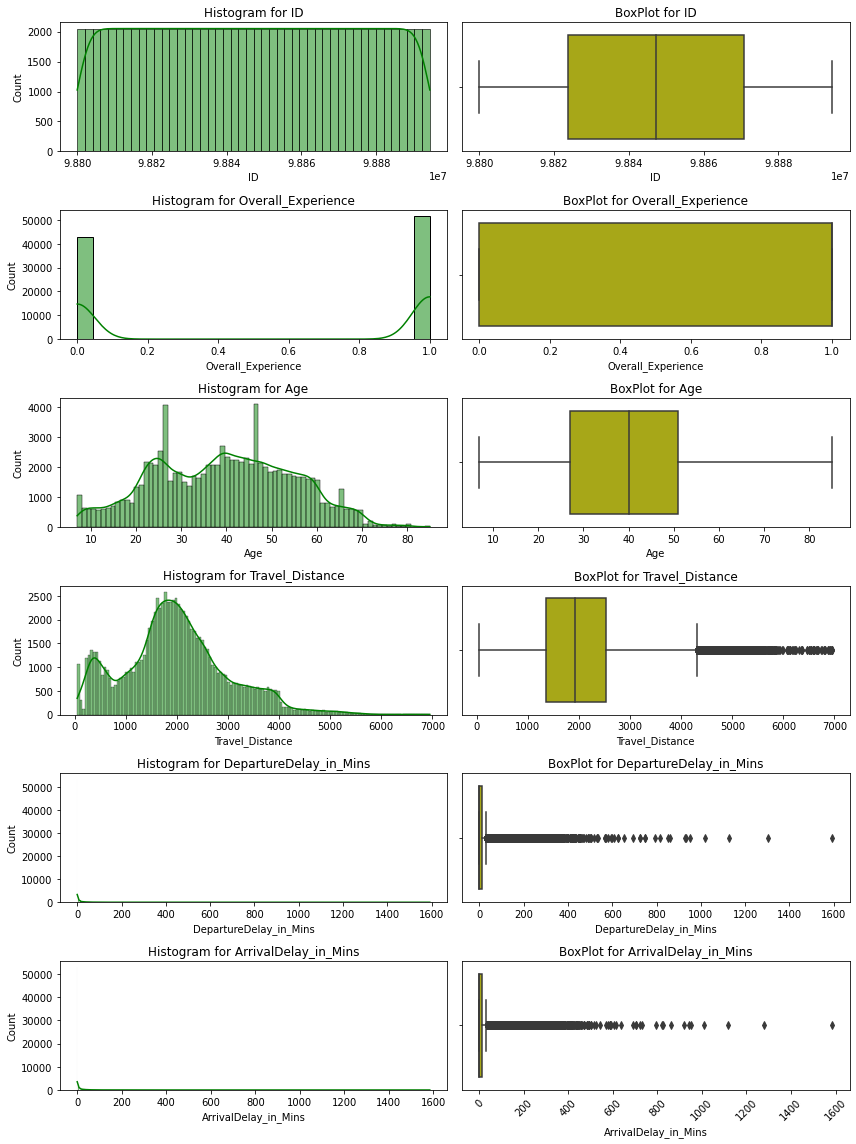

In [213]:
col_list=df.columns
print(col_list)

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,16)
x=0
y=0
for i in df.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df[i], data=df, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [27]:
#df.skew()
df.skew().sort_values(ascending=False)
#calculating skewness before treating outliers present in the data.

DepartureDelay_in_Mins    7.158965
ArrivalDelay_in_Mins      6.992923
Travel_Distance           0.473058
ID                        0.000000
Age                      -0.002387
Overall_Experience       -0.187451
dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ID'),
  Text(1.5, 0, 'Overall_Experience'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Travel_Distance'),
  Text(4.5, 0, 'DepartureDelay_in_Mins'),
  Text(5.5, 0, 'ArrivalDelay_in_Mins')])

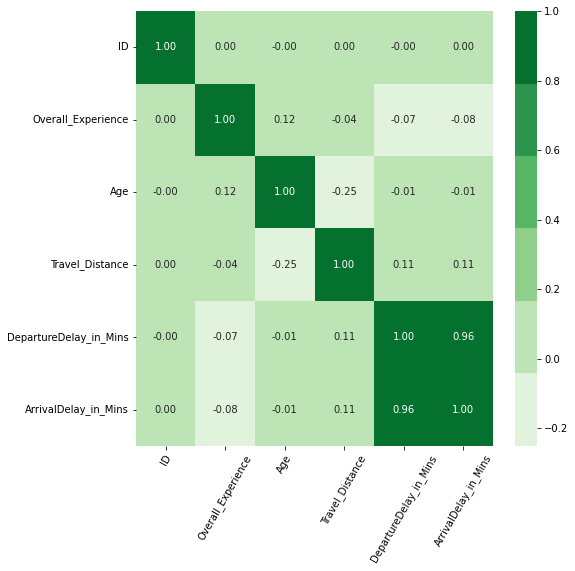

In [214]:
## Heat Map for all Numeric Fields
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Greens")
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap=colormap);
plt.xticks(rotation=60)

# Encoding For Train Data

In [218]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [219]:
# label_encoder object
label_encoder =LabelEncoder()

# Train data Label encoding

In [220]:
col_list=[]
for cols in df.columns:
    if df[cols].dtype=='object':
        print(cols)
        df[cols]= label_encoder.fit_transform(df[cols])

Seat_comfort
Seat_Class
Arrival_time_convenient
Catering
Platform_location
Onboardwifi_service
Onboard_entertainment
Online_support
Onlinebooking_Ease
Onboard_service
Leg_room
Baggage_handling
Checkin_service
Cleanliness
Online_boarding
Gender
CustomerType
TypeTravel
Travel_Class


In [224]:
df.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,4,0,1,1,4,3,4,0,...,4,5,0,0,52.0,0,0,272,0.0,5.0
1,98800002,0,5,1,1,5,3,3,5,3,...,3,3,1,0,48.0,1,1,2200,9.0,0.0
2,98800003,1,4,0,4,4,3,4,3,1,...,1,1,0,0,43.0,0,0,1061,77.0,119.0
3,98800004,0,0,1,4,0,3,0,4,0,...,0,0,0,0,44.0,0,0,780,13.0,18.0
4,98800005,1,0,1,0,0,2,4,3,1,...,3,3,0,0,50.0,0,0,1981,0.0,0.0


# Test Data Label encoding

In [223]:
col_list=[]
for cols in df_to_predict_copy.columns:
    if df_to_predict_copy[cols].dtype=='object':
        print(cols)
        df_to_predict_copy[cols]= label_encoder.fit_transform(df_to_predict_copy[cols])

Seat_comfort
Seat_Class
Arrival_time_convenient
Catering
Platform_location
Onboardwifi_service
Onboard_entertainment
Online_support
Onlinebooking_Ease
Onboard_service
Leg_room
Baggage_handling
Checkin_service
Cleanliness
Online_boarding
Gender
CustomerType
TypeTravel
Travel_Class


In [225]:
df_to_predict_copy.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,0,0,0,0,2,4,1,2,1,...,1,5,0,0,36.0,0,0,532,0.0,0.0
1,99900002,2,1,3,5,2,0,5,0,0,...,1,0,0,1,21.0,0,0,1425,9.0,28.0
2,99900003,1,1,1,1,4,1,1,1,4,...,3,1,1,0,60.0,0,0,2832,0.0,0.0
3,99900004,0,0,1,0,4,5,0,1,5,...,1,5,0,0,29.0,1,1,1352,0.0,0.0
4,99900005,1,1,2,1,3,1,1,1,1,...,1,1,1,1,18.0,0,0,1610,17.0,0.0


# Drop ID Columns 

In [ ]:
df.drop('ID',inplace=True, axis=1)

In [233]:
df.shape

(94379, 24)

In [229]:
df_to_predict_copy.drop('ID',inplace=True, axis=1)

In [234]:
df_to_predict_copy.shape

(35602, 23)

In [230]:
# Copy all the predictor variables into X dataframe. Since 'vote_Labour' is dependent variable drop it
X = df.drop('Overall_Experience', axis=1)
# Copy the 'vote_Labour' column alone into the y dataframe. This is the dependent variable
y = df[['Overall_Experience']]

# Split the Test data

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 123)

In [236]:
X_train.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
8859,0,1,0,0,0,3,0,4,3,3,...,0,3,1,1,29.0,0,1,1778,0.0,0.0
22759,4,0,0,4,0,0,4,0,0,1,...,4,0,1,0,46.0,1,1,1569,0.0,0.0
47025,0,0,0,0,2,1,1,1,1,3,...,3,1,1,0,30.0,0,0,1930,0.0,0.0
40505,4,0,3,4,1,1,4,1,1,4,...,4,1,1,0,47.0,1,1,2121,0.0,10.0
7597,4,0,0,4,3,0,4,0,0,0,...,4,0,1,0,13.0,1,1,3262,52.0,31.0


In [237]:
X_train.shape

(66065, 23)

# Building a Decision Tree Classifier Model and fit it on the Training Set

# DTree Predictions on Train data

In [238]:
from sklearn.tree import DecisionTreeClassifier

In [239]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [240]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [241]:
prediction_dtc=dt_model.predict(X_test)

Accuracy for DecisionTreeClassifier model is 
 0.9162958253867345


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     12773
           1       0.92      0.92      0.92     15541

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



Confusion Matrix for DecisionTreeClassifier model is


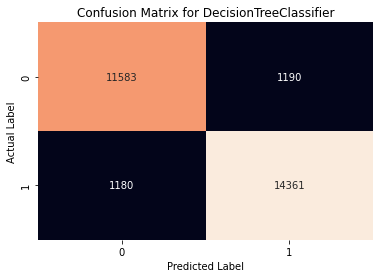

In [242]:
models_names={dt_model:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dt_model]),'\n',accuracy_score(y_test,prediction_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dt_model]),'\n',classification_report(y_test,prediction_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dt_model]))
sns.heatmap(confusion_matrix(y_test,prediction_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [243]:
print(pd.DataFrame(dt_model.feature_importances_,
                 columns=["Imp"],
                 index=pd.DataFrame(X_train).columns).sort_values('Imp', ascending=False))

                              Imp
Onboard_entertainment    0.404435
Seat_comfort             0.160271
Onlinebooking_Ease       0.058551
Travel_Distance          0.038053
Age                      0.033430
Online_support           0.029393
Arrival_time_convenient  0.028229
Platform_location        0.023293
CustomerType             0.021225
Travel_Class             0.020507
Gender                   0.020443
TypeTravel               0.019627
Cleanliness              0.019047
Baggage_handling         0.017482
Leg_room                 0.017043
Checkin_service          0.015625
Catering                 0.015128
ArrivalDelay_in_Mins     0.014838
DepartureDelay_in_Mins   0.013382
Online_boarding          0.010358
Onboard_service          0.010074
Onboardwifi_service      0.006139
Seat_Class               0.003427


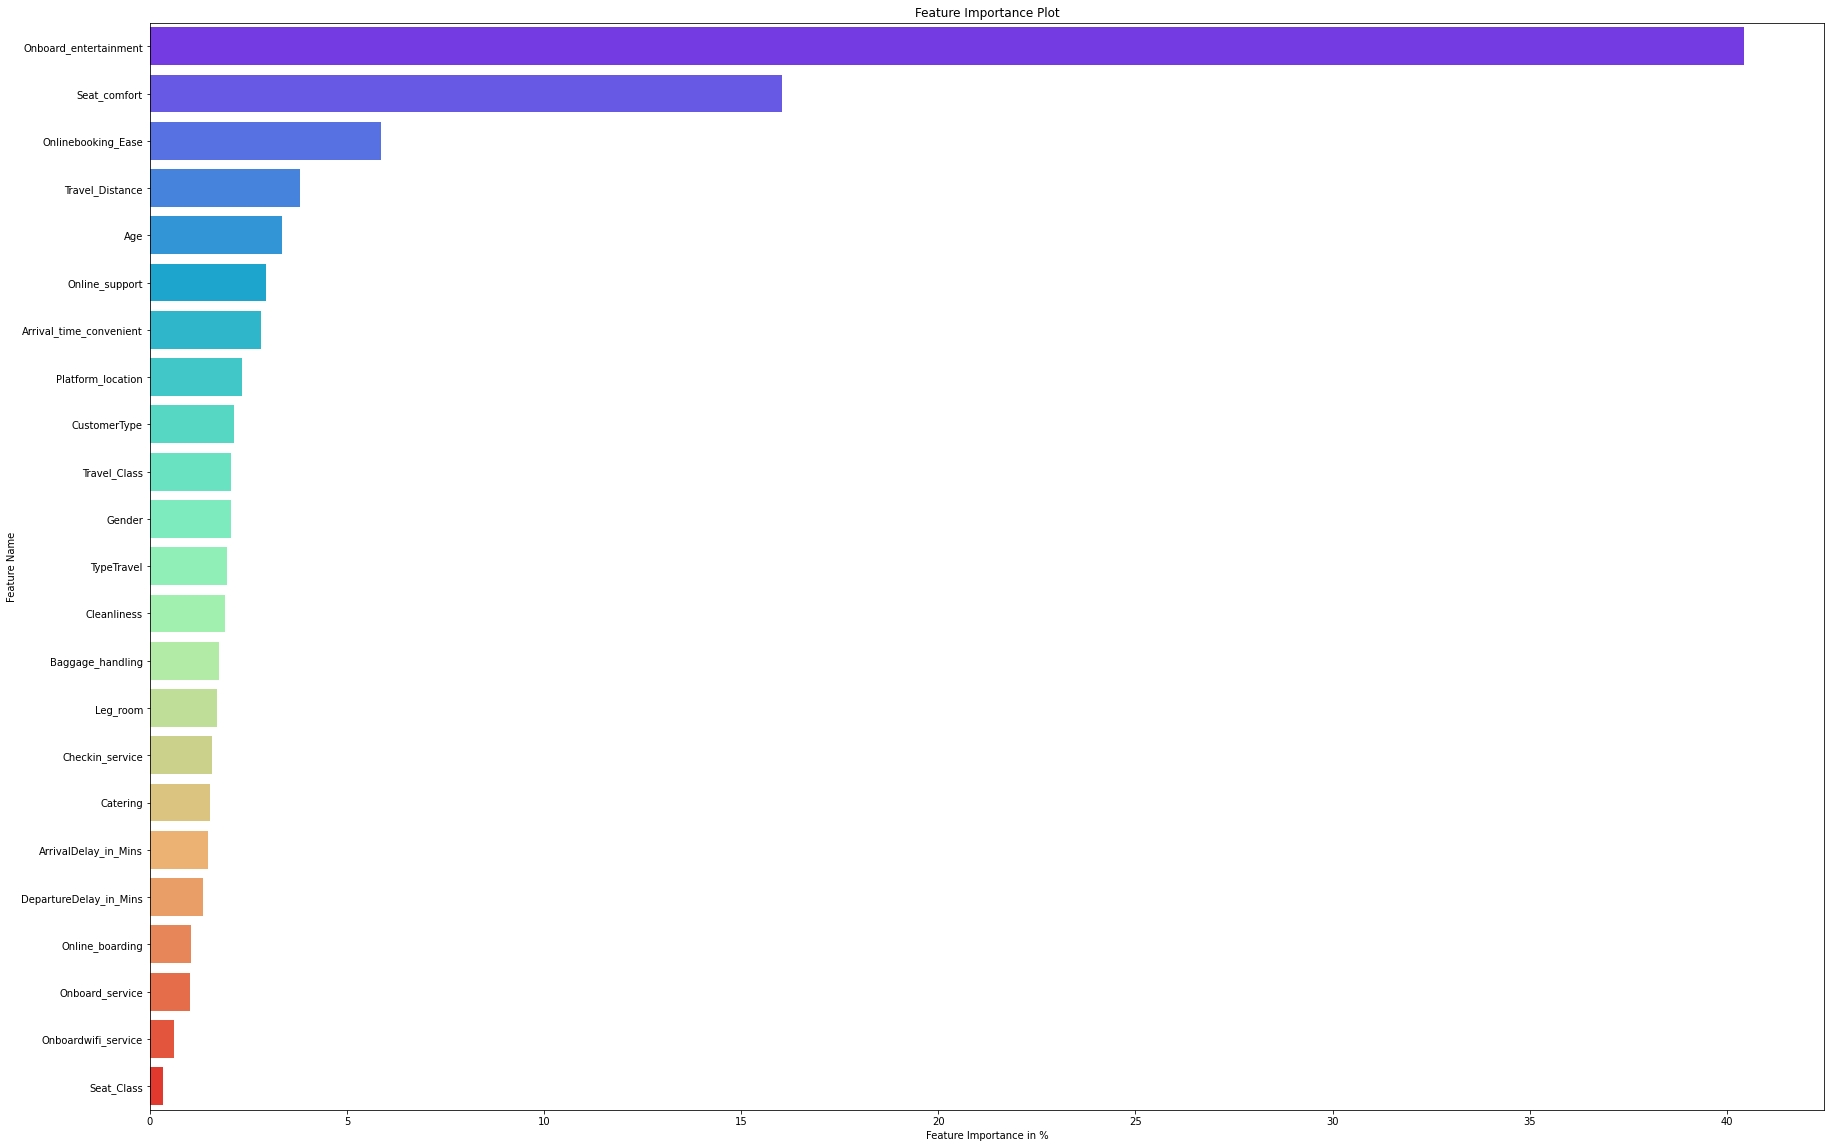

In [244]:
##Print Feature Importances
x=pd.DataFrame(dt_model.feature_importances_*100,index=pd.DataFrame(X_train).columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(30,20))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

# Building a Random Forest Classifier Model and fit it on the Training Set

In [245]:
rfc=RandomForestClassifier(random_state=123)

In [246]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [247]:
prediction_rfc=rfc.predict(X_test)

Accuracy for RandomForestClassifier model is 
 0.9468460832097195


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     12773
           1       0.96      0.94      0.95     15541

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



Confusion Matrix for RandomForestClassifier model is


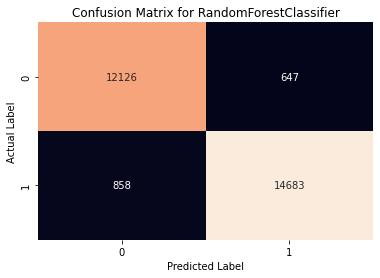

In [248]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfc]),'\n',accuracy_score(y_test,prediction_rfc))
print('\n')
print('Classification report for {} model is'.format(models_names[rfc]),'\n',classification_report(y_test,prediction_rfc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(y_test,prediction_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Building an ANN Model and fit it on the Training Set

In [249]:
mlp=MLPClassifier(hidden_layer_sizes=(200),solver='sgd',random_state=0,max_iter=500)

In [250]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=500, random_state=0,
              solver='sgd')

In [251]:
prediction_ann=mlp.predict(X_test)

Accuracy for ANN model is 
 0.5615949706858798


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.59      0.09      0.16     12773
           1       0.56      0.95      0.70     15541

    accuracy                           0.56     28314
   macro avg       0.57      0.52      0.43     28314
weighted avg       0.57      0.56      0.46     28314



Confusion Matrix for ANN model is


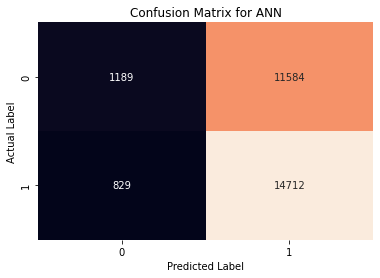

In [252]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_test,prediction_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_test,prediction_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_test,prediction_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Perform Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [254]:
X_train.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
8859,0,1,0,0,0,3,0,4,3,3,...,0,3,1,1,29.0,0,1,1778,0.0,0.0
22759,4,0,0,4,0,0,4,0,0,1,...,4,0,1,0,46.0,1,1,1569,0.0,0.0
47025,0,0,0,0,2,1,1,1,1,3,...,3,1,1,0,30.0,0,0,1930,0.0,0.0
40505,4,0,3,4,1,1,4,1,1,4,...,4,1,1,0,47.0,1,1,2121,0.0,10.0
7597,4,0,0,4,3,0,4,0,0,0,...,4,0,1,0,13.0,1,1,3262,52.0,31.0


In [255]:
#Applying GridSearchCV
grid={'penalty':['l1'],
      'solver':['liblinear'],
      'tol':[0.01]}

In [256]:
logistic_model = LogisticRegression(max_iter=100000,n_jobs=2)

In [257]:
grid_search_logit = GridSearchCV(estimator = logistic_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [258]:
grid_search_logit.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1'], 'solver': ['liblinear'],
                         'tol': [0.01]},
             scoring='f1')

In [259]:
print(grid_search_logit.best_params_,'\n')
print(grid_search_logit.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.01)


In [260]:
best_model_logit = grid_search_logit.best_estimator_

In [261]:
# Prediction on the training set
y_test_predict_logit = best_model_logit.predict(X_test)
y_test_predict_logit

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

Accuracy of the Logistic Regression Model is  0.7535847990393445 

Confusion Matrix 
 [[ 8813  3960]
 [ 3017 12524]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.69      0.72     12773
           1       0.76      0.81      0.78     15541

    accuracy                           0.75     28314
   macro avg       0.75      0.75      0.75     28314
weighted avg       0.75      0.75      0.75     28314



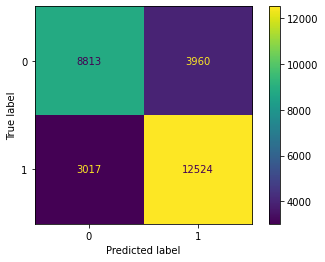

In [262]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the Logistic Regression Model is ',best_model_logit.score(X_test, y_test), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict_logit),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_test_predict_logit))
plot_confusion_matrix(best_model_logit,X_test,y_test)

# Perform LDA

In [263]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [264]:
#Building a LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)

In [265]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_LDA = model_lda.predict(X_test)
y_predict_test_LDA

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [266]:
# Training data probability prediction
y_pred_test_LDA_prob = model_lda.predict_proba(X_test)
## sample record first 3 rows
y_pred_test_LDA_prob[:3,:]

array([[0.76599385, 0.23400615],
       [0.1475264 , 0.8524736 ],
       [0.19919892, 0.80080108]])

Accuracy of the LDA Model is  0.7534435261707989 

Confusion Matrix 
 [[ 8729  4044]
 [ 2937 12604]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71     12773
           1       0.76      0.81      0.78     15541

    accuracy                           0.75     28314
   macro avg       0.75      0.75      0.75     28314
weighted avg       0.75      0.75      0.75     28314



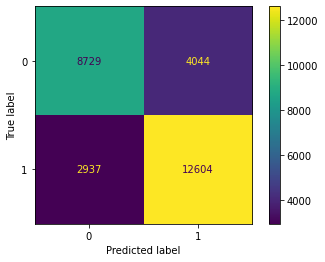

In [267]:
# Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the LDA Model is ',model_lda.score(X_test, y_test), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict_test_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict_test_LDA))
plot_confusion_matrix(model_lda,X_test,y_test)

# Perform KNN Model

In [268]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [269]:
clfKNN=KNeighborsClassifier()
model_KNN = clfKNN.fit(X_train,y_train)

In [270]:
# Training data class Prediction, cut-off value = 0.5
y_predict_train_KNN = model_KNN.predict(X_train)
y_predict_train_KNN

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [271]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_KNN = model_KNN.predict(X_test)
y_predict_test_KNN

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [272]:
# Training data probability prediction
y_pred_test_KNN_prob = model_KNN.predict_proba(X_test)
y_pred_test_KNN_prob

array([[0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       ...,
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8]])

AUC for testing data for KNN Model is : 0.680


Text(0, 0.5, 'True Positive Rate')

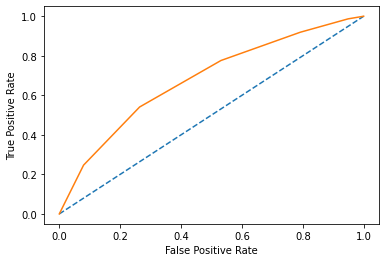

In [273]:
# predict probabilities for testing data set
y_test_predict_KNN_prob = model_KNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_test_predict_KNN_prob = y_test_predict_KNN_prob[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, y_test_predict_KNN_prob)
print('AUC for testing data for KNN Model is : %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, y_test_predict_KNN_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# KNN with different K values

In [274]:
# Create empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.3717948717948718,
 0.36677968496150315,
 0.3625061806879989,
 0.3651903651903652,
 0.36660309387582113,
 0.3627180899908172,
 0.36363636363636365,
 0.3661439570530479,
 0.3668856396129123,
 0.36875750512114147]

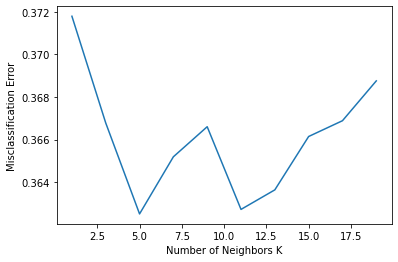

In [275]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [278]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
model_KNN_5 = KNN_model.fit(X_train,y_train)

Classification report for Test data is as follows:
              precision    recall  f1-score   support

           0       0.63      0.47      0.54     12773
           1       0.64      0.78      0.70     15541

    accuracy                           0.64     28314
   macro avg       0.64      0.62      0.62     28314
weighted avg       0.64      0.64      0.63     28314



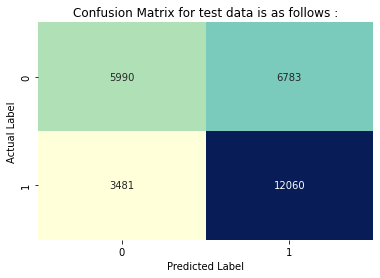

In [279]:
y_test_predict_KNN_5 = model_KNN_5.predict(X_test)

y_test_predict_KNN_5_prob = model_KNN_5.predict_proba(X_test)

##Print Classification Report

## testing data set
print('Classification report for Test data is as follows:')
print(classification_report(y_test,y_test_predict_KNN_5))

##Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_predict_KNN_5),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data is as follows :')
plt.show()

# Naïve Bayes Model

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [281]:
clfKNN=KNeighborsClassifier()
model = GaussianNB()
model_Naive = model.fit(X_train,y_train)

In [282]:
# Training data class Prediction, cut-off value = 0.5
y_predict_train_naive = model_Naive.predict(X_train)
y_predict_train_naive

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [283]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_naive = model_Naive.predict(X_test)
y_predict_test_naive

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [284]:
# Training data probability prediction
y_pred_test_naive_prob = model_Naive.predict_proba(X_test)
y_pred_test_naive_prob

array([[9.99628713e-01, 3.71286841e-04],
       [4.52931052e-02, 9.54706895e-01],
       [9.40171662e-02, 9.05982834e-01],
       ...,
       [1.02672684e-01, 8.97327316e-01],
       [9.94964543e-01, 5.03545725e-03],
       [4.30209113e-03, 9.95697909e-01]])

Classification report for Test data is as follows:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     12773
           1       0.76      0.83      0.79     15541

    accuracy                           0.76     28314
   macro avg       0.76      0.76      0.76     28314
weighted avg       0.76      0.76      0.76     28314



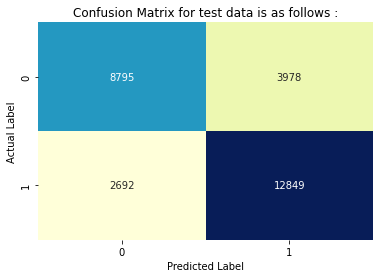

In [285]:
##Print Classification Report
y_test_predict_Naive = model_Naive.predict(X_test)

y_test_predict_Naive_prob = model_Naive.predict_proba(X_test)

## testing data set
print('Classification report for Test data is as follows:')
print(classification_report(y_test,y_test_predict_Naive))

##Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_predict_Naive),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data is as follows :')
plt.show()


# Bagging Classifier (Random Forest should be applied for Bagging)

In [286]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [287]:
#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=50)
bgcl = BaggingClassifier(random_state=1, base_estimator=clfRF, n_estimators=50 ) #BaggingClassifier(n_estimators=50,random_state=1)
model_bgcl = bgcl.fit(X_train, y_train)

In [288]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_bgcl = model_bgcl.predict(X_test)
print(y_predict_test_bgcl)


[0 1 1 ... 0 0 1]


In [289]:
# Training data probability prediction
y_pred_test_bgcl_prob = model_bgcl.predict_proba(X_test)
print(y_pred_test_bgcl_prob)

[[0.9836 0.0164]
 [0.0232 0.9768]
 [0.0284 0.9716]
 ...
 [0.6664 0.3336]
 [0.9864 0.0136]
 [0.0012 0.9988]]


Classification report for Test data is as follows:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12773
           1       0.95      0.95      0.95     15541

    accuracy                           0.95     28314
   macro avg       0.94      0.95      0.94     28314
weighted avg       0.95      0.95      0.95     28314



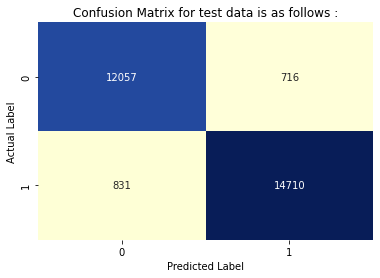

In [290]:
y_test_predict_bgcl = model_bgcl.predict(X_test)
y_test_predict_bgcl_prob = model_bgcl.predict_proba(X_test)

##Print Classification Report

## testing data set
print('Classification report for Test data is as follows:')
print(classification_report(y_test,y_test_predict_bgcl))

##Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_predict_bgcl),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data is as follows :')
plt.show()


# Ada Boosting

In [291]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
model_ADB = clfADB.fit(X_train,y_train)

In [292]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_ADB = model_ADB.predict(X_test)
print(y_predict_test_ADB)

[0 1 1 ... 1 0 1]


In [293]:
# Training data probability prediction
y_pred_test_ADB_prob = model_ADB.predict_proba(X_test)
print(y_pred_test_ADB_prob)

[[0.51038852 0.48961148]
 [0.47920066 0.52079934]
 [0.4929025  0.5070975 ]
 ...
 [0.49797186 0.50202814]
 [0.51197261 0.48802739]
 [0.48510531 0.51489469]]


Classification report for Test data is as follows:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12773
           1       0.91      0.90      0.91     15541

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



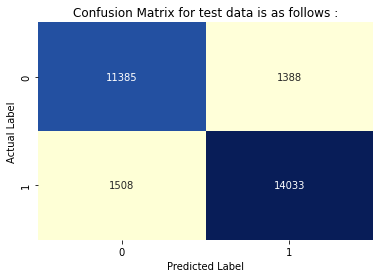

In [294]:
y_test_predict_ADB = model_ADB.predict(X_test)
y_test_predict_ADB_prob = model_ADB.predict_proba(X_test)


##Print Classification Report

## testing data set
print('Classification report for Test data is as follows:')
print(classification_report(y_test,y_test_predict_ADB))

##Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_predict_ADB),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data is as follows :')
plt.show()


# Gradient Boosting

In [295]:
from sklearn.ensemble import GradientBoostingClassifier

In [296]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
model_GDB = gbcl.fit(X_train, y_train)

In [297]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_GDB = model_GDB.predict(X_test)
print(y_predict_test_GDB)

[0 1 1 ... 0 0 1]


In [298]:
# Training data probability prediction
y_pred_test_GDB_prob = model_GDB.predict_proba(X_test)
print(y_pred_test_GDB_prob)

[[0.93195721 0.06804279]
 [0.03060041 0.96939959]
 [0.28553714 0.71446286]
 ...
 [0.74485052 0.25514948]
 [0.9333145  0.0666855 ]
 [0.04099069 0.95900931]]


Classification report for Test data is as follows:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12773
           1       0.91      0.93      0.92     15541

    accuracy                           0.91     28314
   macro avg       0.91      0.91      0.91     28314
weighted avg       0.91      0.91      0.91     28314



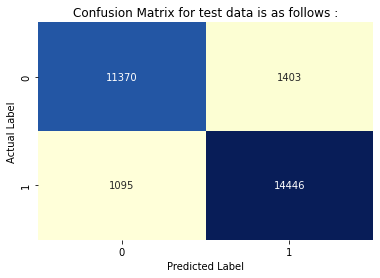

In [299]:
y_test_predict_GDB = model_GDB.predict(X_test)
y_test_predict_GDB_prob = model_GDB.predict_proba(X_test)


##Print Classification Report

## testing data set
print('Classification report for Test data is as follows:')
print(classification_report(y_test,y_test_predict_GDB))

##Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_predict_GDB),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data is as follows :')
plt.show()


# Since the best Accuracy we are getting from Random Forest and Bagging Method

## We would use Bagging or our final model , which gave us 95% accuracy

In [302]:
# Test data class Prediction, cut-off value = 0.5
y_predict_final = model_bgcl.predict(df_to_predict_copy)
print(y_predict_test_bgcl)

[0 1 1 ... 0 0 1]


In [305]:
df_to_predict["Overall_Experience"]=y_predict_final

In [306]:
df_to_predict.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,1
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,1
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,1
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,1
